# <center> Майнор "Интеллектуальный анализ данных" </center>

# <center> Курс "Введение в анализ данных" </center>

# <center> Лабораторная работа №1. Обработка и первичный анализ данных </center>

## Данные

В рамках данной лабораторной работы вам предлагается проанализировать набор данных о студентах двух школ в Португалии.  
В файле `students_data.csv` представлена информация о студентах, посещающих два курса - математику (`Math`) и поргутальский язык (`Por`). Некоторые студенты представлены в обоих курсах, некоторые - только в одном. Для каждого студента известны три оценки по курсу: оценка за первое полугодие (`G1`), оценка за второе полугодие (`G2`) и итоговая оценка за год (`G3`).

In [1]:
# Для работы потребовалось добавить несколько библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [3]:
data = pd.read_csv("students_data.csv")
data.shape

(1044, 36)

In [4]:
data.head(15)

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,cheating,G1,G2,G3
0,100097,Por,GP,F,16,U,GT3,A,3,4,services,other,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3.0,2,1,1.0,4.0,5,12,NaN,15,13,14
1,101021,Por,GP,F,17,U,GT3,T,3,2,other,other,course,mother,1,2,0,no,no,no,yes,no,yes,yes,no,5.0,3,4,1.0,3.0,3,2,NaN,17,18,17
2,102965,Por,GP,M,16,U,LE3,T,1,2,health,services,course,mother,2,1,2,no,no,no,no,no,yes,yes,no,4.0,4,5,3.0,5.0,5,0,yes,9,8,10
3,102989,Por,MS,M,17,U,GT3,T,2,3,other,services,home,father,2,2,0,no,no,no,yes,yes,yes,yes,no,4.0,4,3,1.0,1.0,3,4,no,14,15,16
4,103131,Por,GP,F,16,U,GT3,T,1,1,at_home,other,home,mother,2,1,0,no,yes,no,no,yes,yes,no,NaN,4.0,3,2,1.0,4.0,5,2,yes,12,13,13
5,103144,Por,GP,M,18,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,yes,yes,yes,yes,yes,3.0,3,4,4.0,5.0,4,2,NaN,11,11,12
6,105257,Por,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1.0,1,1,1.0,1.0,5,6,NaN,11,12,9
7,107639,Por,MS,F,15,R,GT3,T,4,4,teacher,other,course,mother,2,1,0,no,no,no,no,yes,yes,yes,yes,1.0,5,1,3.0,5.0,5,0,NaN,13,14,14
8,107914,Math,GP,F,15,U,LE3,T,3,2,services,other,reputation,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4.0,4,4,1.0,1.0,5,10,no,7,6,6
9,108089,Por,MS,M,16,R,GT3,T,3,4,other,health,other,mother,3,2,0,no,no,no,no,no,yes,no,no,3.0,4,5,1.0,2.0,5,4,NaN,9,10,11


### Признаки

Данные представлены признаками различных типов: числовыми, категориальными, упорядоченными категориальными.

**Описание признаков:**

In [5]:
pd.read_csv('students_data_features.csv',
            delimiter=';',
            encoding='windows-1251')

,Признак,Описание
0,ID,Уникальный номер наблюдения
1,Subject,"Предмет: 'Math' - математика, 'Por' - португальский язык"
2,school,"Школа: 'GP' - Gabriel Pereira, 'MS' - Mousinho da Silveira"
3,sex,"Пол студента: 'F' - женский, 'M' - мужской"
4,age,Возраст студента
5,address,"Место проживания студента: 'U' - в городе, 'R' - за городом"
6,famsize,"Число членов семьи: 'LE3' - если <= 3, 'GT3' - если > 3"
7,Pstatus,"Отношения родителей: 'T' - живут вместе, 'A' - живут раздельно"
8,Medu,"Образование матери: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование"
9,Fedu,"Образование отца: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование"


<br>  

## Задания

**NB:** Обратите внимание, что часть студентов посещают оба курса и представлены в данных два раза. Из-за этого некоторые результаты анализа могут быть искажены. Имеет смысл выявить таких студентов заранее ([Задание 11](#task11)) и учитывать эту информацию при анализе.

### Задание 1  
  
 * Для каждого признака определите, к какому типу он относится.   
 * Проверьте значения признаков на наличие опечаток и ошибок, исправьте их.<br>
   __Note:__ Исправлять ошибки нужно программно, модифицировать руками исходный файл нельзя.
 * При необходимости, приведите признак к определенному вами типу.

In [6]:
# сначала я выполнила задание 1, затем задание 11, потом со второго пошла по порядку
data.dtypes

ID              int64
Subject        object
school         object
sex            object
age             int64
address        object
famsize        object
Pstatus        object
Medu           object
Fedu           object
Mjob           object
Fjob           object
reason         object
guardian       object
traveltime      int64
studytime       int64
failures        int64
schoolsup      object
famsup         object
paid           object
activities     object
nursery        object
higher         object
internet       object
romantic       object
famrel        float64
freetime        int64
goout           int64
Dalc          float64
Walc          float64
health          int64
absences        int64
cheating       object
G1              int64
G2              int64
G3              int64
dtype: object

In [7]:
for column in data.columns:
    if data[column].dtype=='object':
        print(column,data[column].unique(),'', sep='\n')

Subject
['Por' 'Math']

school
['GP' 'MS']

sex
['F' 'M' 'm']

address
['U' 'R']

famsize
['GT3' 'LE3']

Pstatus
['A' 'T' 't']

Medu
['3' '1' '2' '4' '0' 'o']

Fedu
['4' '2' '3' '1' 'o' '0']

Mjob
['services' 'other' 'health' 'at_home' 'teacher' 'at-home']

Fjob
['other' 'services' 'health' 'at-home' 'teacher' 'at_home']

reason
['course' 'home' 'reputation' 'other']

guardian
['father' 'mother' 'other' 'futher']

schoolsup
['no' 'yes']

famsup
['no' 'yes']

paid
['no' 'yes']

activities
['no' 'yes']

nursery
['yes' 'no']

higher
['yes' 'no']

internet
['yes' 'no']

romantic
['no' nan 'yes']

cheating
[nan 'yes' 'no']



In [8]:
data.loc[data['sex'] == 'm', 'sex'] = 'M'
data.loc[data['Pstatus'] == 't', 'Pstatus'] = 'T'
data.loc[data['Medu'] == 'o', 'Medu'] = 0
data.loc[data['Fedu'] == 'o', 'Fedu'] = 0
data.loc[data['Mjob'] == 'at-home', 'Mjob'] = 'at_home'
data.loc[data['Fjob'] == 'at-home', 'Fjob'] = 'at_home'
data.loc[data['guardian'] == 'futher', 'guardian'] = 'father'

In [9]:
# на этом этапе выяснилось, что какие-то ID одинаковы, исправляю их
while (data.groupby(by='ID').count().shape[0] != data.shape[0]):
    index = 0
    for i in range(0, data.shape[0]):
        for j in range(i + 1, data.shape[0]):
            if (data.iat[i, 0] == data.iat[j, 0]):
                index = j
    data.loc[index, 'ID'] = data.iat[index, 0] + 1

In [10]:
data['Medu'] = data.Medu.astype('int64')
data['Fedu'] = data.Fedu.astype('int64')
data.dtypes

ID              int64
Subject        object
school         object
sex            object
age             int64
address        object
famsize        object
Pstatus        object
Medu            int64
Fedu            int64
Mjob           object
Fjob           object
reason         object
guardian       object
traveltime      int64
studytime       int64
failures        int64
schoolsup      object
famsup         object
paid           object
activities     object
nursery        object
higher         object
internet       object
romantic       object
famrel        float64
freetime        int64
goout           int64
Dalc          float64
Walc          float64
health          int64
absences        int64
cheating       object
G1              int64
G2              int64
G3              int64
dtype: object

In [11]:
# Далее я решила бинарные признаки привести к 0 и 1, чтобы с ними было легче работать
data.rename(columns={'Subject': 'is_Math', 
                   'school': 'is_GP', 
                   'sex': 'is_Fem', 
                   'address': 'is_U', 
                   'famsize': 'is_LE3',
                   'Pstatus': 'is_together',
                  }, inplace=True)
data = data.replace('Math', 1)
data = data.replace('Por', 0)
data = data.replace('GP', 1)
data = data.replace('MS', 0)
data = data.replace('F', 1)
data = data.replace('M', 0)
data = data.replace('U', 1)
data = data.replace('R', 0)
data = data.replace('LE3', 1)
data = data.replace('GT3', 0)
data = data.replace('T', 1)
data = data.replace('A', 0)
data = data.replace('yes', 1)
data = data.replace('no', 0)
data

,ID,is_Math,is_GP,is_Fem,age,is_U,is_LE3,is_together,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,cheating,G1,G2,G3
0,100097,0,1,1,16,1,0,0,3,4,services,other,course,father,1,1,0,0,0,0,0,1,1,1,0.0,3.0,2,1,1.0,4.0,5,12,NaN,15,13,14
1,101021,0,1,1,17,1,0,1,3,2,other,other,course,mother,1,2,0,0,0,0,1,0,1,1,0.0,5.0,3,4,1.0,3.0,3,2,NaN,17,18,17
2,102965,0,1,0,16,1,1,1,1,2,health,services,course,mother,2,1,2,0,0,0,0,0,1,1,0.0,4.0,4,5,3.0,5.0,5,0,1.0,9,8,10
3,102989,0,0,0,17,1,0,1,2,3,other,services,home,father,2,2,0,0,0,0,1,1,1,1,0.0,4.0,4,3,1.0,1.0,3,4,0.0,14,15,16
4,103131,0,1,1,16,1,0,1,1,1,at_home,other,home,mother,2,1,0,0,1,0,0,1,1,0,NaN,4.0,3,2,1.0,4.0,5,2,1.0,12,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,997832,1,1,1,15,0,0,1,3,3,services,services,reputation,other,2,3,2,0,1,1,1,1,1,1,1.0,4.0,2,1,2.0,3.0,3,8,NaN,10,10,10
1040,997897,0,1,0,15,0,0,1,2,1,health,services,reputation,mother,1,2,0,0,0,0,1,1,1,1,1.0,5.0,4,2,1.0,1.0,5,4,0.0,10,9,10
1041,998425,0,0,1,16,0,1,1,1,1,at_home,other,course,father,3,2,0,0,1,0,0,1,1,0,0.0,5.0,3,2,NaN,1.0,1,0,0.0,16,17,18
1042,999143,0,1,0,16,1,0,1,2,1,at_home,other,course,mother,4,1,0,0,0,0,0,1,1,0,0.0,3.0,2,1,1.0,1.0,2,4,NaN,9,9,11


### Задание 2  
  
Проверьте, присутствуют ли в данных пропущенные значения. Сколько? В каких признаках?  
По каждому такому признаку предложите и обоснуйте, что делать с пропущенными значениями.

In [15]:
print(data.isna().sum(), '\n')
print('Total:', data.isna().sum().sum())

ID               0
is_Math          0
is_GP            0
is_Fem           0
age              0
is_U             0
is_LE3           0
is_together      0
Medu             0
Fedu             0
Mjob             0
Fjob             0
reason           0
guardian         0
traveltime       0
studytime        0
failures         0
schoolsup        0
famsup           0
paid             0
activities       0
nursery          0
higher           0
internet         0
romantic        10
famrel          10
freetime         0
goout            0
Dalc            10
Walc            10
health           0
absences         0
cheating       700
G1               0
G2               0
G3               0
student_ID       0
dtype: int64 

Total: 740


In [16]:
# здесь становится понятным, что в cheating больше половины строк имеют значение nan, поэтому я решаю удалить его
data.drop('cheating', axis=1, inplace=True)
data

,ID,is_Math,is_GP,is_Fem,age,is_U,is_LE3,is_together,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,student_ID
0,100097,0,1,1,16,1,0,0,3,4,services,other,course,father,1,1,0,0,0,0,0,1,1,1,0.0,3.0,2,1,1.0,4.0,5,12,15,13,14,537
1,101021,0,1,1,17,1,0,1,3,2,other,other,course,mother,1,2,0,0,0,0,1,0,1,1,0.0,5.0,3,4,1.0,3.0,3,2,17,18,17,641
2,102965,0,1,0,16,1,1,1,1,2,health,services,course,mother,2,1,2,0,0,0,0,0,1,1,0.0,4.0,4,5,3.0,5.0,5,0,9,8,10,342
3,102989,0,0,0,17,1,0,1,2,3,other,services,home,father,2,2,0,0,0,0,1,1,1,1,0.0,4.0,4,3,1.0,1.0,3,4,14,15,16,46
4,103131,0,1,1,16,1,0,1,1,1,at_home,other,home,mother,2,1,0,0,1,0,0,1,1,0,NaN,4.0,3,2,1.0,4.0,5,2,12,13,13,539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,997832,1,1,1,15,0,0,1,3,3,services,services,reputation,other,2,3,2,0,1,1,1,1,1,1,1.0,4.0,2,1,2.0,3.0,3,8,10,10,10,477
1040,997897,0,1,0,15,0,0,1,2,1,health,services,reputation,mother,1,2,0,0,0,0,1,1,1,1,1.0,5.0,4,2,1.0,1.0,5,4,10,9,10,241
1041,998425,0,0,1,16,0,1,1,1,1,at_home,other,course,father,3,2,0,0,1,0,0,1,1,0,0.0,5.0,3,2,NaN,1.0,1,0,16,17,18,123
1042,999143,0,1,0,16,1,0,1,2,1,at_home,other,course,mother,4,1,0,0,0,0,0,1,1,0,0.0,3.0,2,1,1.0,1.0,2,4,9,9,11,304


### Задание 3  
  
Проанализируйте данные на наличие выбросов.   
Сколько наблюдений можно отнести к выбросам по каждому признаку? Сколько всего выбросов в данных?  
  
**Note:** Выбросы можно не удалять из данных. Это информацию можно учитывать в дальнейшем анализе и удалять выбросы при необходимости. 

In [17]:
low = data.quantile(0.25)
high = data.quantile(0.75)
result = high - low
print(((data < (low - 1.5 * result)) | (data > (high + 1.5 * low))).sum(), "\n")
print("Total:", ((data < (low - 1.5 * result)) | (data > (high + 1.5 * low))).sum().sum())

Dalc            52
Fedu             0
Fjob             0
G1               1
G2              20
G3              54
ID               0
Medu             0
Mjob             0
Walc            73
absences       237
activities       0
age              0
failures       183
famrel          76
famsup           0
freetime        64
goout            0
guardian         0
health           0
higher          89
internet       217
is_Fem           0
is_GP            0
is_LE3           0
is_Math          0
is_U             0
is_together    121
nursery        209
paid           220
reason           0
romantic         0
schoolsup      119
student_ID       0
studytime       62
traveltime      24
dtype: int64 

Total: 1821


### Задание 4 
  
* Посчитайте описательные статистики для числовых и для категориальных признаков. 
* Сколько студентов посещают каждую из школ?  
* Сколько студентов посещают математику, сколько - португальский?  
* Студенты какого курса чаще заваливают экзамены?  
* Сколько в среднем времени в неделю уходит на учебу по каждому предмету?  
* На что чаще обращают внимание при выборе школы?

In [18]:
# Посчитайте описательные статистики для числовых и для категориальных признаков.
# для числовых
data.describe()

,ID,is_Math,is_GP,is_Fem,age,is_U,is_LE3,is_together,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,student_ID
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1034.000000,1034.000000,1044.000000,1044.000000,1034.000000,1034.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,547057.191571,0.378352,0.739464,0.566092,16.726054,0.727011,0.293103,0.884100,2.603448,2.387931,1.522989,1.970307,0.264368,0.113985,0.613027,0.210728,0.494253,0.799808,0.914751,0.792146,0.357834,3.936170,3.201149,3.156130,1.497099,2.291103,3.543103,4.434866,11.213602,11.246169,11.341954,393.875479
std,263827.331938,0.485209,0.439138,0.495850,1.239975,0.445708,0.455404,0.320259,1.124907,1.099938,0.731727,0.834353,0.656142,0.317945,0.487291,0.408021,0.500207,0.400335,0.279386,0.405967,0.479595,0.933297,1.031507,1.152575,0.914808,1.287883,1.424703,6.210017,2.983394,3.285071,3.864796,207.879786
min,100097.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,324017.500000,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000,230.750000
50%,554339.500000,0.000000,1.000000,1.000000,17.000000,1.000000,0.000000,1.000000,3.000000,2.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000,393.500000
75%,774486.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000,574.250000
max,999194.000000,1.000000,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000,750.000000


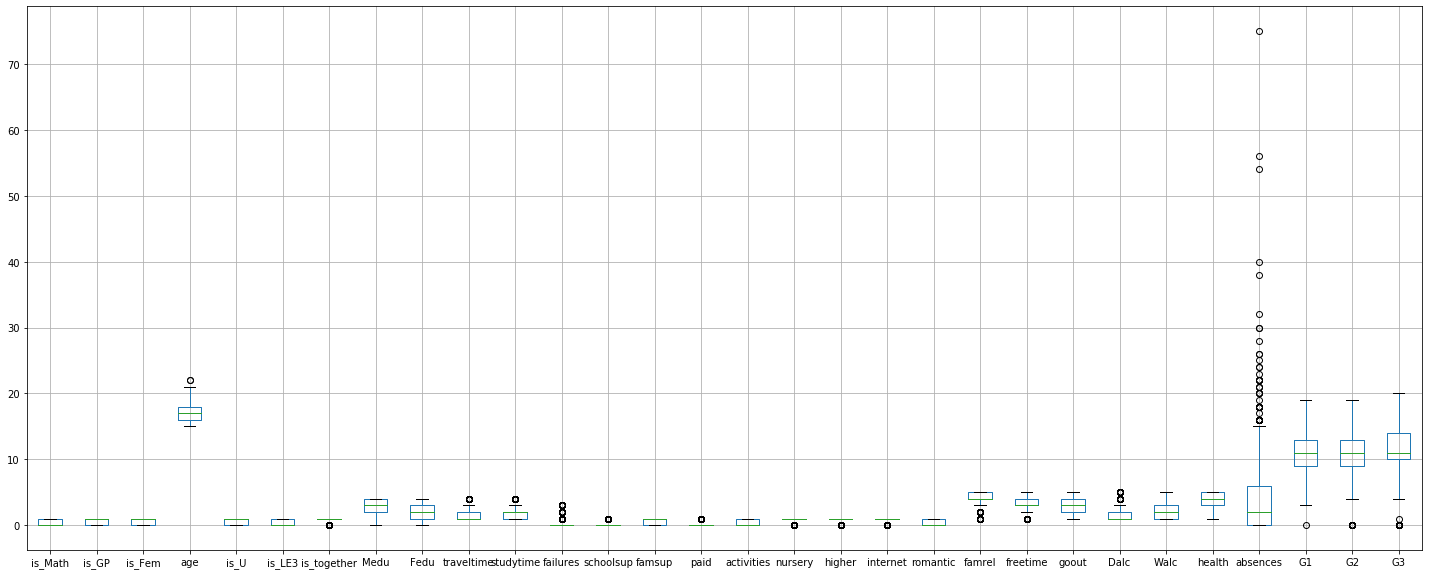

In [19]:
tmp = data.columns[(data.dtypes.values != np.dtype('object'))].to_list()
tmp = tmp[1:len(tmp)-1] 
boxplot = data.boxplot(column = tmp, figsize=(25, 10))
plt.show()

In [20]:
# для категориальных
data.describe(include=['object'])

,Mjob,Fjob,reason,guardian
count,1044,1044,1044,1044
unique,5,5,4,3
top,other,other,course,mother
freq,399,584,430,728


In [21]:
# создаю отдельную базу данных только с уникальными ID студентов
d_unique = data.groupby('student_ID').first()
d_unique

,ID,is_Math,is_GP,is_Fem,age,is_U,is_LE3,is_together,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
student_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,645242,0,0,0,15,0,0,1,1,1,other,other,course,mother,4,2,0,0,1,0,1,1,1,0,1.0,5.0,4,5,2.0,4.0,4,8,7,9,9
2,303154,0,0,0,15,0,0,1,1,2,other,services,course,mother,3,2,0,0,1,0,1,1,1,0,0.0,5.0,5,5,1.0,3.0,5,11,9,11,10
3,384975,0,0,0,15,0,1,1,1,3,at_home,other,reputation,father,3,1,0,0,1,0,1,1,1,1,0.0,4.0,2,4,3.0,5.0,3,2,10,11,11
4,840595,0,0,0,15,0,1,1,4,1,health,services,reputation,father,1,2,0,0,1,0,1,1,1,1,0.0,5.0,3,4,1.0,2.0,2,0,12,13,14
5,736116,0,0,0,15,0,1,1,4,1,health,services,reputation,father,1,2,0,0,1,0,1,1,1,1,0.0,5.0,3,4,1.0,2.0,2,7,7,9,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746,188948,1,1,1,19,1,1,1,3,2,services,other,reputation,other,2,2,1,0,1,1,0,0,1,1,1.0,4.0,2,2,1.0,2.0,1,22,13,10,11
747,867667,0,1,1,20,0,0,1,1,1,other,other,reputation,other,2,3,0,0,0,0,0,1,1,1,1.0,3.0,2,2,1.0,3.0,3,8,11,15,15
748,804253,0,1,1,20,0,0,1,2,1,other,other,course,other,2,2,0,0,1,1,1,1,0,1,1.0,1.0,2,3,1.0,2.0,2,8,10,12,12


In [22]:
# Сколько студентов посещают каждую из школ?
print(d_unique.groupby(by='is_GP').count().ID[1], 'students in GP')
print(d_unique.groupby(by='is_GP').count().ID[0], 'students in MS')

510 students in GP
240 students in MS


In [23]:
# Сколько студентов посещают математику, сколько - португальский?
print(data.groupby(by='is_Math').count().ID[1], 'students in Math class')
print(data.groupby(by='is_Math').count().ID[0], 'students in Portugal language class')

395 students in Math class
649 students in Portugal language class


In [24]:
# Студенты какого курса чаще заваливают экзамены?
math_fail = data.groupby(by='is_Math').mean().failures[1]
por_fail = data.groupby(by='is_Math').mean().failures[0]
if (math_fail > por_fail):
    print('Math students fail more')
elif (por_fail > math_fail):
    print('Portugal language students fail more')
else:
    print('Same')
print(math_fail, 'is an average number of failures of Math students')
print(por_fail, 'is an average number of failures of Portugal language students')

Math students fail more
0.3341772151898734 is an average number of failures of Math students
0.2218798151001541 is an average number of failures of Portugal language students


In [25]:
# Сколько в среднем времени в неделю уходит на учебу по каждому предмету?
print(data.groupby(by='is_Math').mean().studytime[1], 'is an average value of studytime of Math students')
print(data.groupby(by='is_Math').mean().studytime[0], 'is an average value of studytime of Portugal language students')

2.0354430379746837 is an average value of studytime of Math students
1.9306625577812018 is an average value of studytime of Portugal language students


In [26]:
# На что чаще обращают внимание при выборе школы?
d_unique.groupby(by=['reason']).count().sort_values("ID").index[3]

'course'

### Задание 5  
  
Оцените распределение оценок (отдельно для `G1`, `G2` и `G3`). Сравните распределения для разных предметов - математики и португальского языка. Сделайте выводы.  
  
**Tip:** Для выполнения задания пригодятся графики плотности, гистограммы и боксплоты.

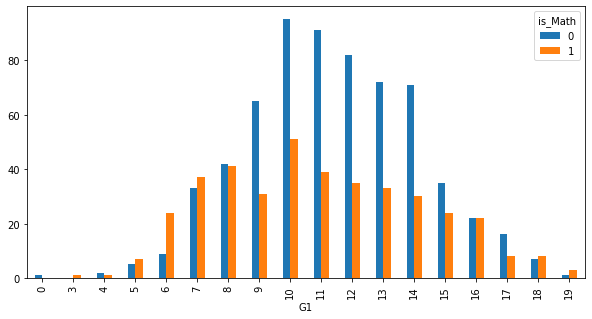

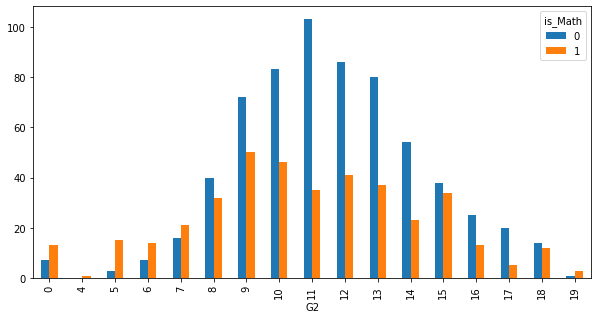

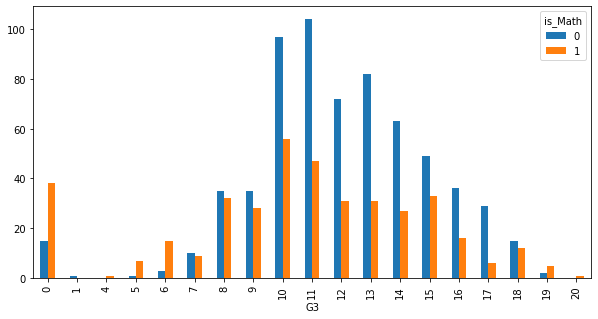

In [27]:
data.groupby(by=['G1', 'is_Math']).ID.count().unstack().plot(kind="bar", figsize=(10, 5))
plt.show()
data.groupby(by=['G2', 'is_Math']).ID.count().unstack().plot(kind="bar", figsize=(10, 5))
plt.show()
data.groupby(by=['G3', 'is_Math']).ID.count().unstack().plot(kind="bar", figsize=(10, 5))
plt.show()
# 1 - Math, 0 - Portugal

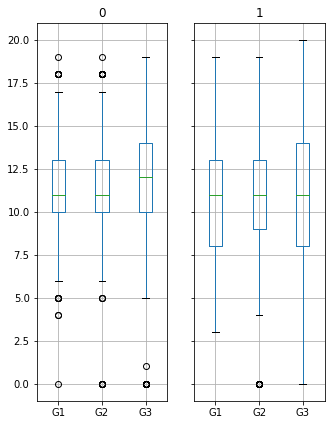

In [28]:
data.groupby(by='is_Math').boxplot(column=['G1', 'G2', 'G3'], figsize=(5, 7))
plt.show()

In [ ]:
# По результатам всех полугодий математика дается студентам сложнее, чем португальский
# По математике оценки разбросаны от минимального до максимального, в то время, как по португальскому результаты
# в основном от 5 до 9 

### Задание 6 
  
Оцените попарные зависимости числовых признаков.  
Рассчитайте и провизуализируйте матрицу корреляций. Дайте содержательный комментарий.

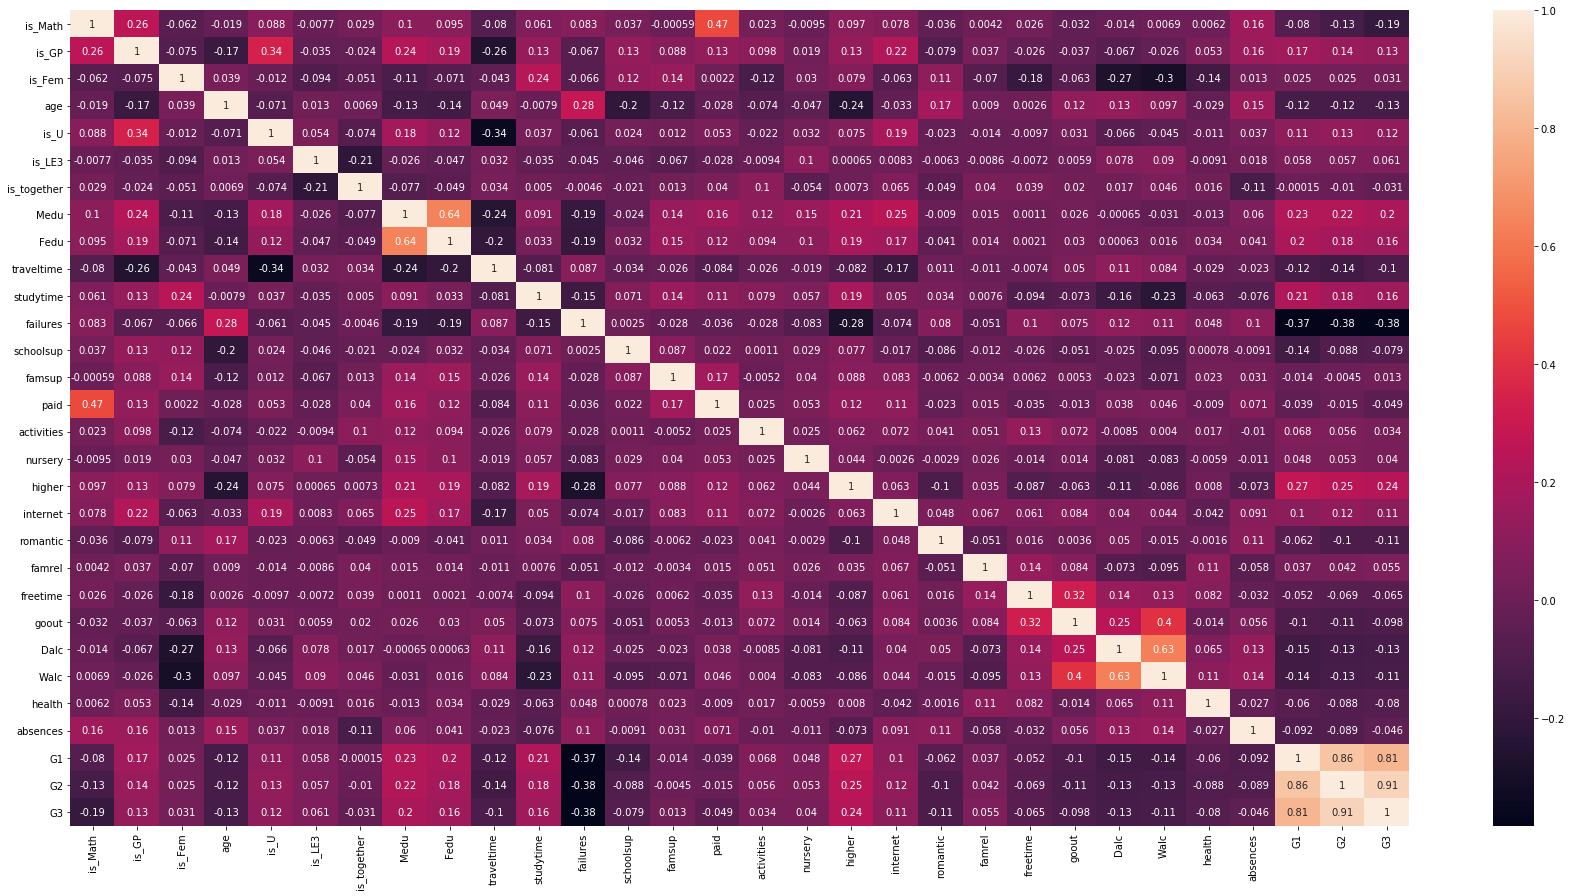

In [30]:
fig, ax = plt.subplots(figsize=(30,15)) 
tmp = data.columns[(data.dtypes.values != np.dtype('object'))].to_list()
tmp = tmp[1:len(tmp)-1] # чтобы не захватывать student_ID
corr_mat = data[tmp].corr()
sns.heatmap(corr_mat, 
            annot=True, 
            mask=corr_mat.isnull(), 
            ax=ax)
plt.ylim((corr_mat.shape[0], 0))
plt.show()

In [224]:
# Очевидно, что присутствует сильная взаимосвязь G1, G2 и G3, она и является самой яркой и заметной из всех. Также
# прослеживается параллель между употреблением алкоголя на неделе и в выходные, менее заметным - goout и Walc, goout
# и freetime, goout и Dalc, higher с G1, G2, G3, is_Math и paid. Взаимосвязь такая, что чем больше одна переменная, 
# тем больше и другая.
# Обратную связь можно заметить у failures и G1, G2, G3 (чем меньше одна переменная, тем больше другая), higher 
# с age, failures; Dalc, Walc с is_Fem; is_U, is_GP с traveltime
# Можно сделать выводы, что на оценки влияют высшее образование (если оно есть, то это лучше), количество failures 
# чем меньше, тем лучше. Можно провести также паралелль, что уровень образования родителей влияет и на оценки студентов
# чем выше образования, тем они лучше.
# Люди, живущие в городе, тратят меньше времени на дорогу, так же, как и студенты, которые ходям в школу GP.
# Пьют больше мужчины.
# Кроме того, чем выше образование одного из родителей, тем выше и у другого

### Задание 7  
  
Оцените попарные зависимости нечисловых (категориальных) признаков, дайте содержательный комментарий. 

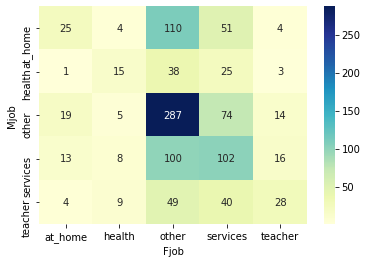

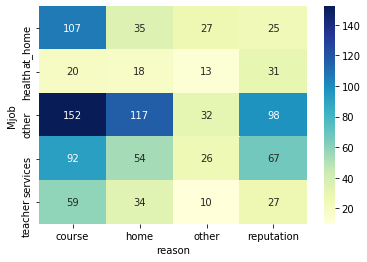

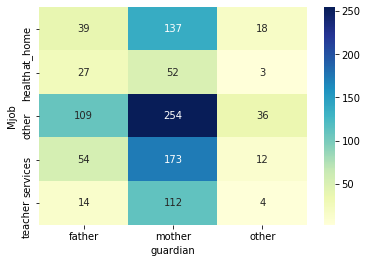

In [66]:
# Вероятно, я неправильно могла понять задание, но я сделала это через матрицу и подсчитывала количество 
# студентов, которым принадлежит та или иная пара свойств, из этого смотрела на тенденцию

# Mjob с другими категориями
df_tmp = data.groupby(['Mjob', 'Fjob'])['student_ID'].count().reset_index()
df_tmp = df_tmp.pivot(index='Mjob', columns='Fjob', values='student_ID').fillna(0)
sns.heatmap(df_tmp, 
            annot=True, 
            fmt='.0f', 
            cmap="YlGnBu")
plt.show()
df_tmp = data.groupby(['Mjob', 'reason'])['student_ID'].count().reset_index()
df_tmp = df_tmp.pivot(index='Mjob', columns='reason', values='student_ID').fillna(0)
sns.heatmap(df_tmp, 
            annot=True, 
            fmt='.0f', 
            cmap="YlGnBu")
plt.show()
df_tmp = data.groupby(['Mjob', 'guardian'])['student_ID'].count().reset_index()
df_tmp = df_tmp.pivot(index='Mjob', columns='guardian', values='student_ID').fillna(0)
sns.heatmap(df_tmp, 
            annot=True, 
            fmt='.0f', 
            cmap="YlGnBu")
plt.show()

In [ ]:
# Относительно Mjob-Fjob можно заметить, что чаще всего оба родителя работают на работе категории other, менее
# распространены комбинации other(f)-services, other(f)-home, services-services; меньше всего - at_home(f)-teacher
# Mjob-reason: course чаще всего выбирают с работой other & at_home, home - other, other - other, reputation - other
# Mjob-guardian: чаще всего опекунами являюся мамы с работой other, services, at_home, teacher мужа; 
# отцы - c работой other, other - c работой отца other

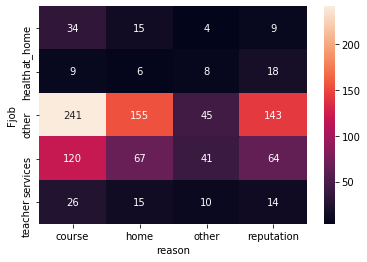

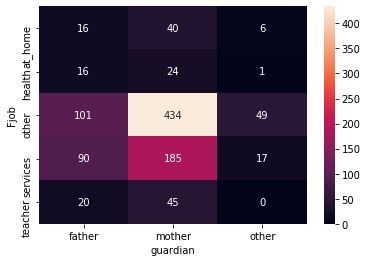

In [70]:
# Fjob с другими категориями
df_tmp = data.groupby(['Fjob', 'reason'])['student_ID'].count().reset_index()
df_tmp = df_tmp.pivot(index='Fjob', columns='reason', values='student_ID').fillna(0)
sns.heatmap(df_tmp, 
            annot=True, 
            fmt='.0f')
plt.show()
df_tmp = data.groupby(['Fjob', 'guardian'])['student_ID'].count().reset_index()
df_tmp = df_tmp.pivot(index='Fjob', columns='guardian', values='student_ID').fillna(0)
sns.heatmap(df_tmp, 
            annot=True, 
            fmt='.0f')
plt.show()

In [ ]:
# Fjob-reason: course чаще всего выбирают мамы с работой other & services, home - other & services, other - other, 
# reputation - other, services
# Fjob-guardian: чаще всего опекунами являюся мамы с работой other, services; отцы - с работой other & services
# жены, other - other

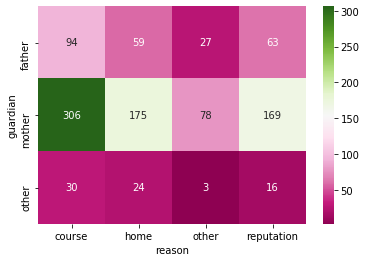

In [72]:
# guardian с reason
df_tmp = data.groupby(['guardian', 'reason'])['student_ID'].count().reset_index()
df_tmp = df_tmp.pivot(index='guardian', columns='reason', values='student_ID').fillna(0)
sns.heatmap(df_tmp, 
            annot=True, 
            fmt='.0f',
            cmap="PiYG"
           )
plt.show()

In [ ]:
# Все опекуны чаще выбирают по course, менее всего - other

### Задание  8  
  
* Оцените, есть ли разница в употреблении алкоголя между парнями и девушками. Кто пьет больше?
* Оцените связь употребления алкоголя с признаками: address, Pstatus, higher, romantic, freetime. 
* Оцените связь употребления алкоголя с уровнем образования опекуна (для случаев, где это известно).
* Сравните употребление алкоголя для 50 лучших учеников и 50 худших (по `G3`). Выполните сравнение отдельно для каждого предмета (`Math` и `Por`). Дайте содержательный комментарий.  
  
**Tip:** для выполнения задания пригодятся боксплоты и гистограммы. 

In [41]:
# Оцените, есть ли разница в употреблении алкоголя между парнями и девушками. Кто пьет больше?
# Создаю доп. столбец, равный сумме употребления алкоголя и в будни, и в выходные, буду исходить из общего показателя
# работаю с d_unique, где количество строк равно кол-ву студентов
d_unique['AlcSum'] = d_unique[["Dalc", "Walc"]].sum(axis=1)
d_unique['AlcSum'] = d_unique['AlcSum'] / 2 # считаю среднее значение между употреблением на неделе и в выходные
falco = d_unique.groupby(by='is_Fem').mean().AlcSum[1]
malco = d_unique.groupby(by='is_Fem').mean().AlcSum[0]
if (malco > falco):
    print('Males drink more')
elif (falco > malco):
    print('Females drink more')
else:
    print('Same')
print(falco, 'is an average value females drink')
print(malco, 'is an average value males drink')

Males drink more
1.5856481481481481 is an average value females drink
2.3034591194968552 is an average value males drink


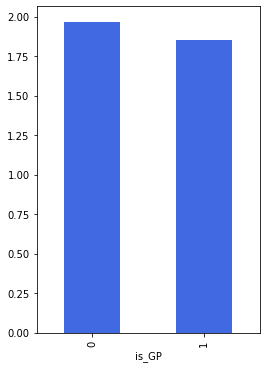

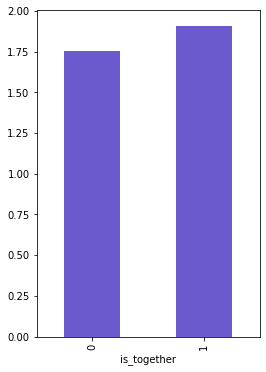

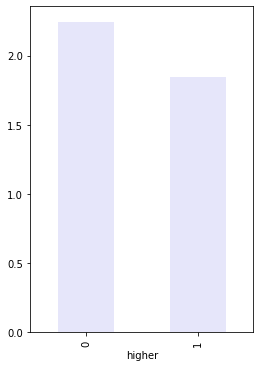

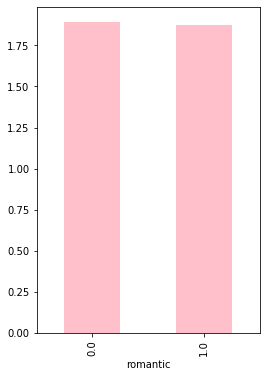

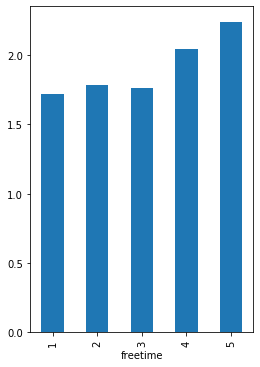

In [148]:
# Оцените связь употребления алкоголя с признаками: address, Pstatus, higher, romantic, freetime.
d_unique.groupby('is_GP').AlcSum.mean().plot(kind="bar", figsize=(4,6), color='royalblue')
plt.show()
d_unique.groupby('is_together').AlcSum.mean().plot(kind="bar", figsize=(4,6), color='slateblue')
plt.show()
d_unique.groupby('higher').AlcSum.mean().plot(kind="bar", figsize=(4,6), color='lavender')
plt.show()
d_unique.groupby('romantic').AlcSum.mean().plot(kind="bar", figsize=(4,6), color='pink')
plt.show()
d_unique.groupby('freetime').AlcSum.mean().plot(kind="bar", figsize=(4,6))
plt.show()

In [ ]:
# Заметнее всего разница между людьми, у кого много свободного времени и у кого мало: чем люди свободнее, тем больше
# пьют (за исключением второго столбца), а также заметно, что люди с высшим образованием меньше пьют, впрочем, как
# и студенты с разведенными родителями
# В остальном значения отличаются незначительно

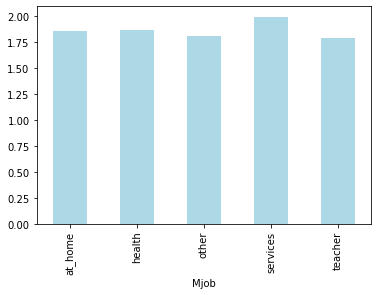

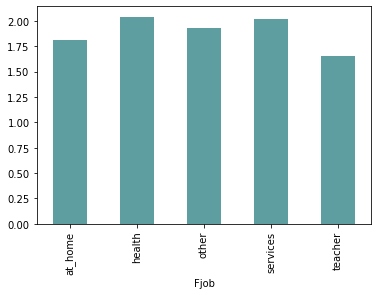

In [84]:
# Оцените связь употребления алкоголя с уровнем образования опекуна (для случаев, где это известно).
d_unique.loc[d_unique['guardian'] == 'mother'].groupby('Mjob').AlcSum.mean().plot(kind="bar", color='lightblue')
plt.show()
d_unique.loc[d_unique['guardian'] == 'father'].groupby('Fjob').AlcSum.mean().plot(kind="bar", color='cadetblue')
plt.show()

In [ ]:
# Когда опекуны - преподаватели, студенты пьют меньше, когда работа связана со здоровьем или администрацией - больше

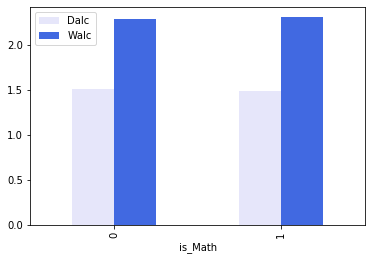

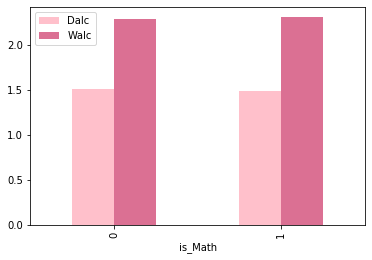

In [127]:
# Сравните употребление алкоголя для 50 лучших учеников и 50 худших (по G3). Выполните сравнение отдельно для 
# каждого предмета (Math и Por)
# Для 50 лучших
tmp = data.sort_values("G3").tail(50)
data.groupby('is_Math').mean().plot(y=['Dalc', 'Walc'], kind='bar', color=['lavender', 'royalblue'])
plt.show()
# 50 худших
tmp = data.sort_values("G3").head(50)
data.groupby('is_Math').mean().plot(y=['Dalc', 'Walc'], kind='bar', color=['pink', 'palevioletred'])
plt.show()
# Алкоголь употребляется одинаковов внезависимости от рейтинга

### Задание 9     
  
Оцените зависимость итоговой оценки от следующих признаков: 
  
* Пола
* Времени в пути от дома до школы
* Наличия дополнительной помощи в учебе (от членов семьи или вообще)
* Посещения платных дополнительных занятий
* Наличия интернета
* Наличия романтических отношений
* Употребления алкоголя  

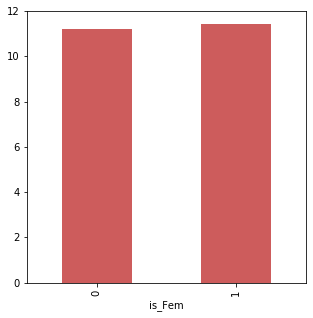

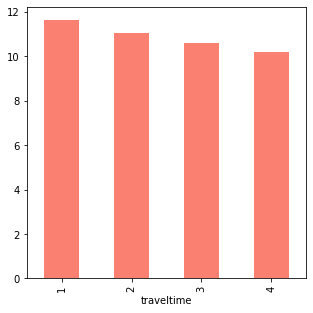

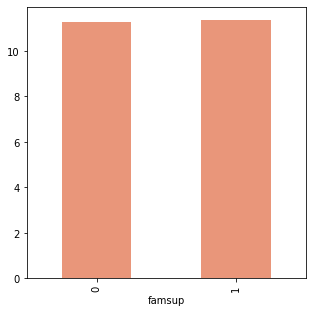

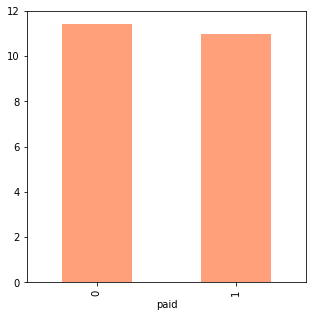

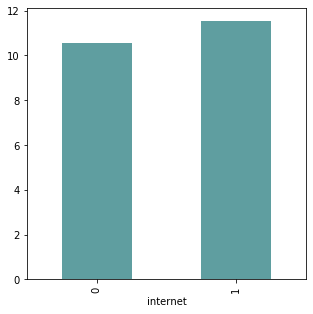

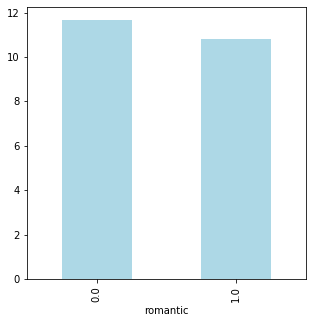

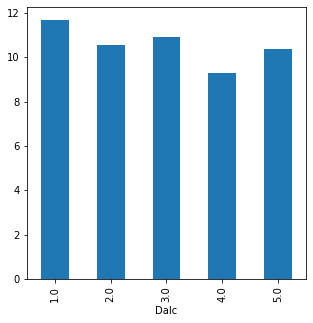

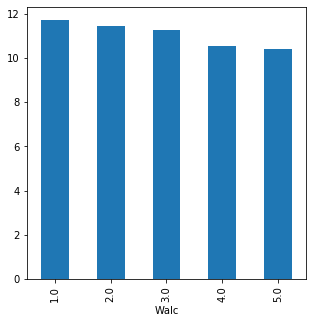

In [85]:
# Пола
data.groupby('is_Fem').G3.mean().plot(kind="bar", figsize=(5,5), color='indianred')
plt.show()
# Времени в пути от дома до школы
data.groupby('traveltime').G3.mean().plot(kind="bar", figsize=(5,5), color='salmon')
plt.show()
# Наличия дополнительной помощи в учебе (от членов семьи или вообще)
data.groupby('famsup').G3.mean().plot(kind="bar", figsize=(5,5), color='darksalmon')
plt.show()
# Посещения платных дополнительных занятий
data.groupby('paid').G3.mean().plot(kind="bar", figsize=(5,5), color='lightsalmon')
plt.show()
# Наличия интернета
data.groupby('internet').G3.mean().plot(kind="bar", figsize=(5,5), color='cadetblue')
plt.show()
# Наличия романтических отношений
data.groupby('romantic').G3.mean().plot(kind="bar", figsize=(5,5), color='lightblue')
plt.show()
# Употребления алкоголя
data.groupby('Dalc').G3.mean().plot(kind="bar", figsize=(5,5))
plt.show()
data.groupby('Walc').G3.mean().plot(kind="bar", figsize=(5,5))
plt.show()

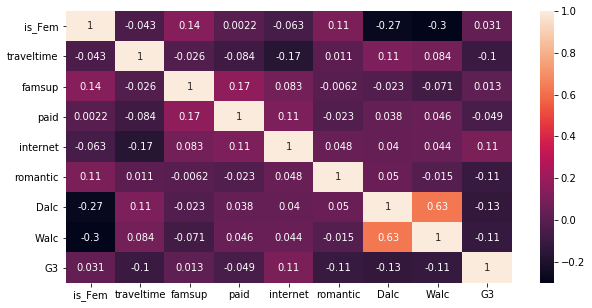

In [45]:
fig, ax = plt.subplots(figsize=(10,5)) 
corr_mat = data[['is_Fem', 'traveltime', 'famsup', 'paid', 'internet', 'romantic', 'Dalc', 'Walc', 'G3']].corr()
sns.heatmap(corr_mat, 
            annot=True,
            mask=corr_mat.isnull(),
            ax=ax)
plt.ylim((corr_mat.shape[0], 0))
plt.show()

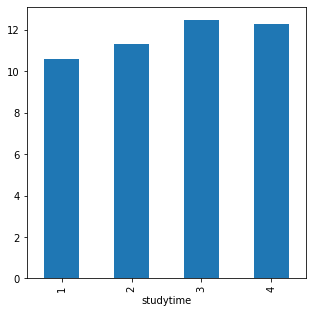

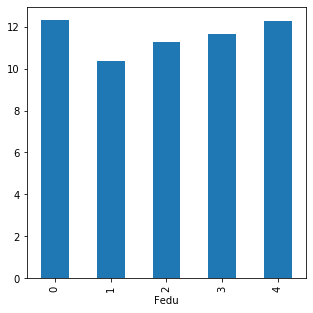

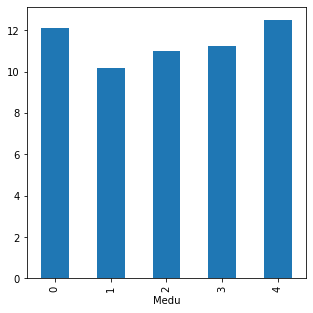

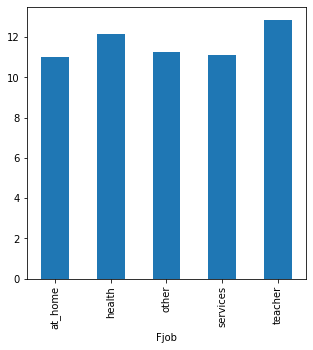

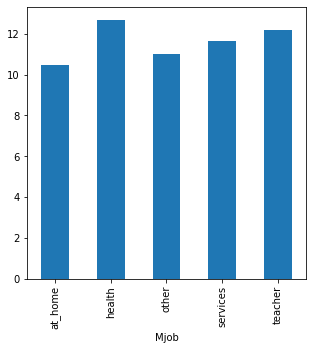

In [47]:
# Для себя хотела посмотреть зависимость от studytime, образования и работы родителей
data.groupby('studytime').G3.mean().plot(kind="bar", figsize=(5,5))
plt.show()
data.groupby('Fedu').G3.mean().plot(kind="bar", figsize=(5,5))
plt.show()
data.groupby('Medu').G3.mean().plot(kind="bar", figsize=(5,5))
plt.show()
data.groupby('Fjob').G3.mean().plot(kind="bar", figsize=(5,5))
plt.show()
data.groupby('Mjob').G3.mean().plot(kind="bar", figsize=(5,5))
plt.show()

### Задание 10  
  
Добавьте в данные новый признак - итоговая оценка по 4-х балльной шкале:  

* Отлично: 18 <= `G3` <= 20
* Хорошо: 14 <= `G3` <= 17
* Удовлетворительно: 8 <= `G3` <= 13
* Неудовлетворительно: `G3` < 8  
  
Оцените распределение нового признака в зависимости от признака `reason` (причина выбора школы). Дайте содержательный комментарий. 

In [48]:
data['Mark'] = 0
for x in range(data.shape[0]):
    if (18 <= data.at[x, 'G3'] <= 20):
        data.at[x, "Mark"] = 4
    elif (14 <= data.at[x, 'G3'] <= 17):
        data.at[x, "Mark"] = 3
    elif (8 <= data.at[x, 'G3'] <= 13):
        data.at[x, "Mark"] = 2
    else:
        data.at[x, "Mark"] = 1
data

,ID,is_Math,is_GP,is_Fem,age,is_U,is_LE3,is_together,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,student_ID,Mark
0,100097,0,1,1,16,1,0,0,3,4,services,other,course,father,1,1,0,0,0,0,0,1,1,1,0.0,3.0,2,1,1.0,4.0,5,12,15,13,14,537,3
1,101021,0,1,1,17,1,0,1,3,2,other,other,course,mother,1,2,0,0,0,0,1,0,1,1,0.0,5.0,3,4,1.0,3.0,3,2,17,18,17,641,3
2,102965,0,1,0,16,1,1,1,1,2,health,services,course,mother,2,1,2,0,0,0,0,0,1,1,0.0,4.0,4,5,3.0,5.0,5,0,9,8,10,342,2
3,102989,0,0,0,17,1,0,1,2,3,other,services,home,father,2,2,0,0,0,0,1,1,1,1,0.0,4.0,4,3,1.0,1.0,3,4,14,15,16,46,3
4,103131,0,1,1,16,1,0,1,1,1,at_home,other,home,mother,2,1,0,0,1,0,0,1,1,0,NaN,4.0,3,2,1.0,4.0,5,2,12,13,13,539,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,997832,1,1,1,15,0,0,1,3,3,services,services,reputation,other,2,3,2,0,1,1,1,1,1,1,1.0,4.0,2,1,2.0,3.0,3,8,10,10,10,477,2
1040,997897,0,1,0,15,0,0,1,2,1,health,services,reputation,mother,1,2,0,0,0,0,1,1,1,1,1.0,5.0,4,2,1.0,1.0,5,4,10,9,10,241,2
1041,998425,0,0,1,16,0,1,1,1,1,at_home,other,course,father,3,2,0,0,1,0,0,1,1,0,0.0,5.0,3,2,NaN,1.0,1,0,16,17,18,123,4
1042,999143,0,1,0,16,1,0,1,2,1,at_home,other,course,mother,4,1,0,0,0,0,0,1,1,0,0.0,3.0,2,1,1.0,1.0,2,4,9,9,11,304,2


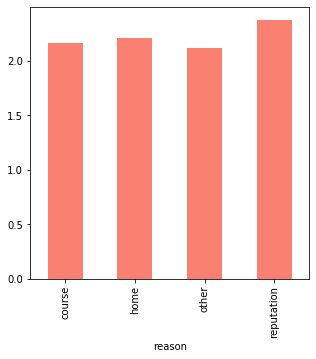

In [86]:
data.groupby('reason').Mark.mean().plot(kind="bar", figsize=(5,5), color='salmon')
plt.show()

In [ ]:
# Средняя оценка студентов, которые выбрали школу из-за репутации, выше, но не намного, все средние значения
# варьируются от 2 до 3

### Задание  11 <a id="task11"></a>  
  
Часть из представленных в данных студентов посещали оба курса - `Math` и `Por`.  
* Предложите способ идентификации студентов и определите тех, кто посещал оба курса. Сколько таких студентов?  
* Для этих студентов сравните оценки по двум предметам, дайте комментарий.  
  
**Note:** Столбец `ID` является уникальным идентификатором наблюдения, но не студента. Он будет уникален для каждой строки.

In [12]:
# добавляю столбец student_ID, который содержит уникальный номер каждого студента
data.loc[:, 'student_ID'] = 0
names = data.columns.to_list()
# можно обойтись без доп. базы данных, но я создаю ее для того, чтобы у меня была отсортированная база, а 
# изначальная осталась прежней (не считая нового столбца)
# сортирую базу, чтобы не делать цикл в цикле для сравнения строк друг с другом, а сравнивать только соседние
data_2 = data.sort_values(by=names[2:]).reset_index(drop=True)
# далее я беру для сравнения столбцы, которые, как мне показалось, не относятся к конкретному предмету, 
# а содержат общие данные о студентах, по ним я буду искать студентов
names = names[2:19] + names[20:31]
student_id = 1
for i in range (0, data_2.shape[0] - 1):
    # сразу проверяю, идет ли речь об одном и том же предмете в записях или нет, если об одном - это не имеет смысла
    if (data_2.at[i, 'is_Math'] != data_2.at[i+1, 'is_Math']):
        count = 0
        for j in names:
            if (data_2.at[i, j] == data_2.at[i+1, j]):
                count += 1
            else:
                break
        # 
        if (count == len(names)):
            data.loc[data['ID'] == data_2.at[i, 'ID'], 'student_ID'] = student_id
            data.loc[data['ID'] == data_2.at[i+1, 'ID'], 'student_ID'] = student_id
            data_2.at[i, 'student_ID'] = student_id
            data_2.at[i+1, 'student_ID'] = student_id
            student_id += 1
            continue
    if (data_2.at[i, 'student_ID'] == 0):
        data.loc[data['ID'] == data_2.at[i, 'ID'], 'student_ID'] = student_id
        student_id += 1    
if (data_2.at[data_2.shape[0] - 1, 'student_ID'] == 0):
    data.loc[data['ID'] == data_2.at[data_2.shape[0] - 1, 'ID'], 'student_ID'] = student_id
data.sort_values(by='student_ID').tail(30)

,ID,is_Math,is_GP,is_Fem,age,is_U,is_LE3,is_together,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,cheating,G1,G2,G3,student_ID
939,918856,0,1,1,18,1,1,1,4,2,teacher,other,course,mother,1,2,0,0,1,0,1,1,1,1,0.0,4.0,2,2,1.0,1.0,3,0,1.0,14,17,17,724
62,147837,0,1,1,18,1,1,1,4,3,health,services,course,mother,2,1,0,0,1,0,0,1,1,1,0.0,3.0,2,4,1.0,4.0,1,8,NaN,12,12,15,725
585,604447,1,1,1,18,1,1,1,4,3,other,other,home,other,2,2,0,0,1,1,0,1,1,1,1.0,4.0,4,5,1.0,2.0,2,10,NaN,10,8,8,726
604,625551,0,1,1,18,1,1,1,4,3,other,other,home,other,2,2,0,0,1,0,0,1,1,1,1.0,4.0,4,5,1.0,2.0,2,0,NaN,13,14,14,726
955,930546,1,1,1,19,0,0,0,3,1,services,at_home,home,other,1,3,1,0,0,1,0,1,1,0,0.0,5.0,4,3,1.0,2.0,5,12,1.0,14,13,13,727
358,400306,1,1,1,19,0,0,1,2,3,other,other,reputation,other,1,3,1,0,0,0,0,1,1,1,1.0,4.0,1,2,1.0,1.0,3,40,NaN,13,11,11,728
629,638768,0,1,1,19,0,0,1,3,2,services,services,reputation,father,1,2,1,1,1,0,0,1,0,1,0.0,3.0,3,3,4.0,3.0,3,0,0.0,9,8,10,729
189,250001,0,1,1,19,1,0,1,0,1,at_home,other,course,other,1,2,2,0,1,0,0,0,0,0,0.0,3.0,4,2,1.0,1.0,5,0,NaN,9,10,11,730
762,752203,1,1,1,19,1,0,1,0,1,at_home,other,course,other,1,2,3,0,1,0,0,0,0,0,0.0,3.0,4,2,1.0,1.0,5,2,NaN,7,8,9,731
572,591594,1,1,1,19,1,0,1,1,1,at_home,health,home,other,1,3,2,0,0,0,0,0,1,1,1.0,4.0,1,2,1.0,1.0,3,14,NaN,15,13,13,732


In [13]:
print(data.shape[0] - student_id, "have both subjects")

294 have both subjects


In [14]:
# выводится информация на каждого студента: средняя оценка по математике, португальскому 
# также, сколько процентов студентов лучше в математике, португальском или имеют одинаковые успехи
# результаты округляю до 3 знака, поэтому 100% может не получиться
index = 1
math_average = 0
por_average = 0
better_at_math = 0
same = 0
count = 0
while (student_id >= index):
    tmp_data = data.loc[data['student_ID'] == index]
    if (tmp_data.shape[0] > 1):
        math = tmp_data.loc[tmp_data['is_Math'] == 1].iat[0, 35]
        por = tmp_data.loc[tmp_data['is_Math'] == 0].iat[0, 35]
        count += 1
        math_average += math
        por_average += por
        if (math > por):
            better_at_math += 1
        elif (math == por):
            same += 1
    index += 1
print("Math average mark:", math_average / count)
print("Portugal average mark:", por_average / count)
print(round(better_at_math / count * 100, 3), "% of students are better in Math")
print(round((count - better_at_math - same) / count * 100, 3), "% of students are better in Portugal")
print(round(same / count * 100, 3), "% of students have same results in both subjects")

Math average mark: 10.976190476190476
Portugal average mark: 12.853741496598639
25.51 % of students are better in Math
63.265 % of students are better in Portugal
11.224 % of students have same results in both subjects


### Задание 12  
  
Предложите простую модель для определения (предсказания) итоговой оценки студента по 4-х балльной системе. Оцените точность предложенной модели. 

In [50]:
# Самый простой способ определить оценку - использовать G1 и G2
is_right = 0
is_false = 0
for x in range(data.shape[0]):
    # беру сумму от 34 из расчета, что преподаватель может немного повысить оценку 
    if (data['G1'][x] + data['G2'][x] > 33):
        if (data["Mark"][x] == 4):
            is_right += 1
        else:
            is_false += 1
    else:
        if (data["Mark"][x] == 4):
            is_false += 1
print("Percentage of right results:", is_right / (is_right + is_false) * 100, "%")

Percentage of right results: 65.21739130434783 %


In [ ]:
# модель выше работает хорошо для большей половины случаев, но ее сложно назвать хорошей, хотя модель кажется
# максимально логичной

### Задание * (бонусное)  
  
Дополнительное исследование данных и выводы положительно скажутся на оценке. 

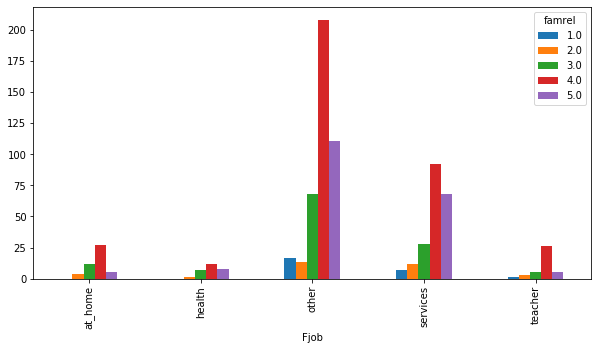

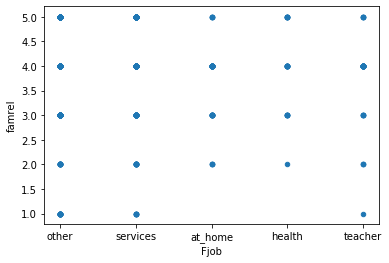

In [109]:
# 1. Связь работы родителей и отношений в семье
d_unique.groupby(by=['Fjob', 'famrel']).ID.count().unstack().plot(kind="bar", figsize=(10, 5))
plt.show()
d_unique.plot(x='Fjob', y='famrel', kind='scatter')
plt.show()
# Плохие отношения в семье (1) совсем не присутсвует в семьях, где мама работает в сфере здоровья или находится дома,
# но стоит заметить, что во всех семьях, независимо от работы матери, взаимоотношения > 3, в семье с мамой-учителей
# вообще подавляющая часть отношений равна 4

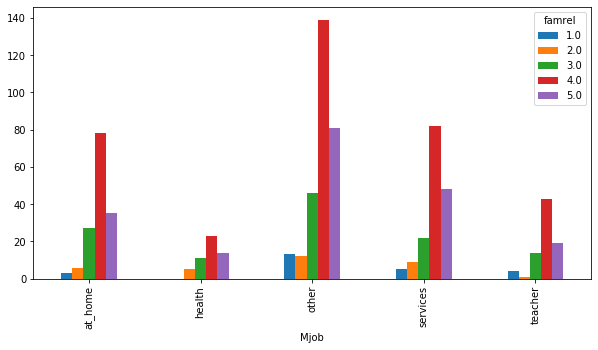

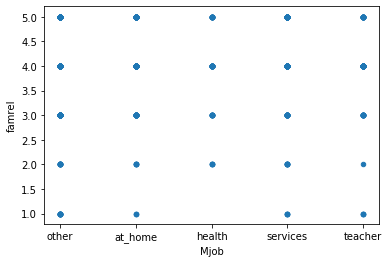

In [110]:
d_unique.groupby(by=['Mjob', 'famrel']).ID.count().unstack().plot(kind="bar", figsize=(10, 5))
plt.show()
d_unique.plot(x='Mjob', y='famrel', kind='scatter')
plt.show()
# Плохие отношения в семье не присутсвует в семьях, где отец работает в сфере здоровья,
# в остальном можно заметить, что соотнощение приблизительно похоже (не считая почти отсутствия 2 в категории 
# teacher, и большего кол-ва 1, чем 2 в other), чаще всего в семьях встречается взаимотношения 4, потом 5, 3, 2 и 1.

In [143]:
# 2. Сравнение оценок G3 среди студентов, взявших один и два курса
tmp = data.groupby('student_ID').G3.count()
tmp_2 = data.groupby('student_ID').G3.mean()
av_for_single = 0
av_for_double = 0
# 750 всего, у 294 - оба
for x in range(1, tmp.shape[0]+1):
    if (tmp[x] == 2):
        av_for_double += tmp_2[x]
    else:
        av_for_single += tmp_2[x]
print("Students with both courses average mark:", av_for_double / 294)
print("Students with only one course average mark:", av_for_single / (750-294))


Students with both courses average mark: 11.914965986394558
Students with only one course average mark: 10.603070175438596


In [146]:
# 3. Сравнение итоговых оценок среди студентов, взявших один и два курса
tmp_2 = data.groupby('student_ID').Mark.mean()
av_for_single = 0
av_for_double = 0
# 750 всего, у 294 - оба
for x in range(1, tmp.shape[0]+1):
    if (tmp[x] == 2):
        av_for_double += tmp_2[x]
    else:
        av_for_single += tmp_2[x]
print("Students with both courses average mark:", av_for_double / 294)
print("Students with only one course average mark:", av_for_single / (750-294))

Students with both courses average mark: 2.312925170068027
Students with only one course average mark: 2.098684210526316


In [ ]:
# У людей с двумя курсами средний балл выше и за G3, и за итоговую оценку